# TASK 6.4: Supervised Machine Learning

### 1. Import Libraries & Files
### 2. Cleaning data
### 3. Explore data visually
### 4. State Hypothesis
### 5. Reshape the variables into NumPy arrays
### 6. Split the data into a training set and a test set
### 7. Run a linear regression on the data - First, fit the model you created to the training set. Then, create a prediction for y on the test set
### 8. Create a plot that shows the regression line on the test set.
### 9. Interpretation of how well the line appears to fit the data.
### 10. Check the model performance statistics—MSE and R2
### 11. Compare the predicted y values with the actual y values in a dataframe

## 1. Import Libraries & Files

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs
%matplotlib inline

In [3]:
# Import data:
# Create string of location
path = '/Users/aegarcia/Desktop/Data analytics/6. Adv Analytics & Dasboard design'
# Import accidents data
df_car = pd.read_csv(os.path.join(path, '2 Data', 'Prepared data', 'accidents_clean2.csv'), index_col = False)
df_acc_state = pd.read_csv(os.path.join(path, '2 Data', 'Original data', 'accidents_per_state.csv'), index_col = False)

## 2. Cleaning data

In [4]:
# Check names of columns
df_car.columns

Index(['Unnamed: 0', 'number', 'state', 'date', 'weekday', 'county', 'time',
       'hour', 'total_vehicles', 'persons', 'fatalities', 'route_type',
       'urban_rural', 'driver_age', 'driver_gender', 'driver_license',
       'car_year', 'car_make', 'car_model', 'speed_limit', 'above_limit',
       'weather', 'driver_drugs', 'drug_category', 'type_drugs',
       'driver_alcohol', 'alcohol_level (%)', 'death_race', 'age_range',
       'speed_range', 'drug_alcohol_use', 'weekday_no'],
      dtype='object')

In [5]:
# Drop the first columns
df_car = df_car.drop(columns = ['Unnamed: 0'])

In [6]:
# Check columns again
df_car.columns

Index(['number', 'state', 'date', 'weekday', 'county', 'time', 'hour',
       'total_vehicles', 'persons', 'fatalities', 'route_type', 'urban_rural',
       'driver_age', 'driver_gender', 'driver_license', 'car_year', 'car_make',
       'car_model', 'speed_limit', 'above_limit', 'weather', 'driver_drugs',
       'drug_category', 'type_drugs', 'driver_alcohol', 'alcohol_level (%)',
       'death_race', 'age_range', 'speed_range', 'drug_alcohol_use',
       'weekday_no'],
      dtype='object')

In [7]:
# Check how data looks like
pd.options.display.max_columns = None
df_car.head()

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range,speed_range,drug_alcohol_use,weekday_no
0,0,Alabama,"January 1, 2020",Wednesday,ELMORE,2:58,2,1,4,3,County Road,Rural,24,Male,Suspended,1997.0,Lexus,ES,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.294,Black or African American,Young adult,31 - 59 mph,alcohol,3.0
1,1,Alabama,"January 2, 2020",Thursday,JEFFERSON,17:18,17,4,6,1,Local Street,Urban,40,Female,Suspended,1993.0,Chevrolet,Corsica,35,No,Rain,Yes,Opioid,FENTANYL,No,0.000,Not a Fatality (not Applicable),Adult,31 - 59 mph,drugs,4.0
2,2,Alabama,"January 2, 2020",Thursday,SHELBY,14:55,14,2,2,1,State Highway,Rural,34,Female,Revoked,1995.0,Toyota,Camry,65,Yes,Rain,No,No drug,Test Not Given,No,0.000,White,Young adult,60mph and above,none,4.0
3,3,Alabama,"January 3, 2020",Friday,CALHOUN,15:20,15,1,5,1,County Road,Rural,17,Male,Valid,2007.0,Hyundai,Azera,35,Yes,Cloudy,Yes,Depressant,DELTA 9,No,0.000,Not a Fatality (not Applicable),Teenager,31 - 59 mph,drugs,5.0
4,4,Alabama,"January 4, 2020",Saturday,COOSA,0:45,0,1,1,1,County Road,Rural,47,Female,Valid,2013.0,GMC,Yukon,45,No,Rain,No,No drug,Test Not Given,No,0.000,White,Adult,31 - 59 mph,none,6.0


In [8]:
# Check for any missing values
df_car.isnull().sum()

number               0
state                0
date                 0
weekday              0
county               0
time                 0
hour                 0
total_vehicles       0
persons              0
fatalities           0
route_type           0
urban_rural          0
driver_age           0
driver_gender        0
driver_license       0
car_year             0
car_make             0
car_model            0
speed_limit          0
above_limit          0
weather              0
driver_drugs         0
drug_category        0
type_drugs           0
driver_alcohol       0
alcohol_level (%)    0
death_race           0
age_range            0
speed_range          0
drug_alcohol_use     0
weekday_no           0
dtype: int64

In [9]:
# Check for any duplicates
dups = df_car.duplicated()
dups

0        False
1        False
2        False
3        False
4        False
         ...  
34342    False
34343    False
34344    False
34345    False
34346    False
Length: 34347, dtype: bool

In [10]:
dups.shape

(34347,)

#### No missing values nor duplicates found! 

## 3. Explore data visually

In [11]:
df_car.describe()

,number,hour,total_vehicles,persons,fatalities,driver_age,car_year,speed_limit,alcohol_level (%),weekday_no
count,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000
mean,17173.000000,13.219000,1.568754,2.204443,1.087984,41.772586,2008.275599,48.685911,0.035159,4.206685
std,9915.269184,6.797849,0.783246,1.604276,0.346687,18.355673,7.665318,13.103441,0.078894,1.990967
min,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,1923.000000,10.000000,0.000000,1.000000
25%,8586.500000,8.000000,1.000000,1.000000,1.000000,26.000000,2003.000000,40.000000,0.000000,2.000000
50%,17173.000000,14.000000,1.000000,2.000000,1.000000,38.000000,2008.000000,50.000000,0.000000,4.000000
75%,25759.500000,19.000000,2.000000,3.000000,1.000000,55.000000,2015.000000,55.000000,0.000000,6.000000
max,34346.000000,23.000000,15.000000,61.000000,8.000000,100.000000,2021.000000,85.000000,0.558000,7.000000


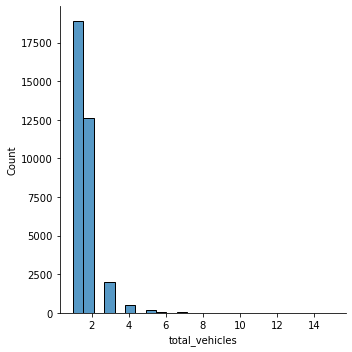

In [12]:
# check for extreme values
sns.displot(df_car['total_vehicles'], bins=25)

In [13]:
# Check observation with more than 8 vehicles involved in an accident
df_car[df_car['total_vehicles'] > 8 ]

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range,speed_range,drug_alcohol_use,weekday_no
3494,3494,California,"May 10, 2020",Sunday,LOS ANGELES,13:41,13,10,19,1,Interstate,Urban,32,Male,Valid,2008.0,International,MA025,55,Yes,Clear,No,No drug,Test Not Given,No,0.00,Not a Fatality (not Applicable),Young adult,31 - 59 mph,none,7.0
4650,4650,California,"July 17, 2020",Friday,SACRAMENTO,23:46,23,11,1,1,Unknown,Urban,26,Male,Not licensed,2009.0,Toyota,Camry,40,Yes,Clear,Yes,Cannabis,DELTA 9,No,0.00,White,Young adult,31 - 59 mph,drugs,5.0
5640,5640,California,"September 8, 2020",Tuesday,SACRAMENTO,17:40,17,11,14,1,Interstate,Urban,23,Male,Valid,2019.0,Freightliner,"New Cascadia 126"" Sleepercab",65,Yes,Clear,No,No drug,Test Not Given,No,0.00,Not a Fatality (not Applicable),Young adult,60mph and above,none,2.0
6223,6223,Colorado,"October 14, 2020",Wednesday,LARIMER,16:17,16,15,24,1,Local Street,Urban,73,Male,Valid,2005.0,Roadmaster,Roadmaster,45,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.00,Not a Fatality (not Applicable),Older Adult,31 - 59 mph,none,3.0
7930,7930,Florida,"June 24, 2020",Wednesday,MANATEE,13:9,13,10,13,2,Interstate,Rural,46,Male,Valid,2005.0,Peterbilt,379,70,No,Cloudy,Yes,Positive - Unknown,"Tested For Drugs, Drugs Found, Type unknown/Po...",No,0.00,Not a Fatality (not Applicable),Adult,60mph and above,drugs,3.0
10585,10585,Georgia,"September 29, 2020",Tuesday,COLUMBIA,12:45,12,10,11,1,Interstate,Rural,26,Male,Valid,2014.0,Peterbilt,579,70,Yes,Clear,Yes,Depressant,BARBITURATES,No,0.00,Not a Fatality (not Applicable),Young adult,60mph and above,drugs,2.0
12363,12363,Indiana,"January 5, 2020",Sunday,BOONE,11:5,11,9,26,3,Interstate,Rural,34,Male,Valid,2019.0,Freightliner,"New Cascadia 126"" Sleepercab",70,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.00,Not a Fatality (not Applicable),Young adult,60mph and above,none,7.0
19548,19548,Nevada,"April 20, 2020",Monday,CLARK,15:40,15,10,16,1,Local Street,Urban,69,Male,Valid,1993.0,Toyota,Camry,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.15,Other Asian or Pacific Islander,Older Adult,31 - 59 mph,alcohol,1.0
25871,25871,Pennsylvania,"December 16, 2020",Wednesday,CLINTON,15:26,15,12,12,1,Interstate,Rural,34,Male,Valid,2019.0,Volvo Truck,VNL,70,Yes,Snow,No,No drug,Test Not Given,No,0.00,Not a Fatality (not Applicable),Young adult,60mph and above,none,3.0
31856,31856,Utah,"February 9, 2020",Sunday,GRAND,20:9,20,9,4,2,U.S. Highway,Urban,41,Male,Suspended,2020.0,Chevrolet,Silverado,30,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.00,Not a Fatality (not Applicable),Adult,31 - 59 mph,none,7.0


In [14]:
# There are only 10 records that have more than 8 vehicles, I will remove them from the data
df_car = df_car[df_car['total_vehicles'] < 8 ]

In [15]:
df_car.shape

(34326, 31)

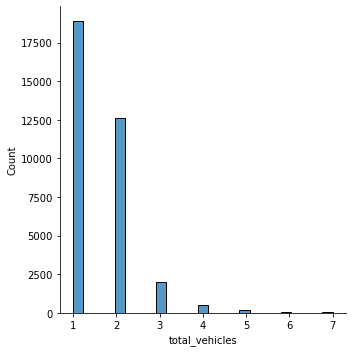

In [16]:
# check for extreme values
sns.displot(df_car['total_vehicles'], bins=25)

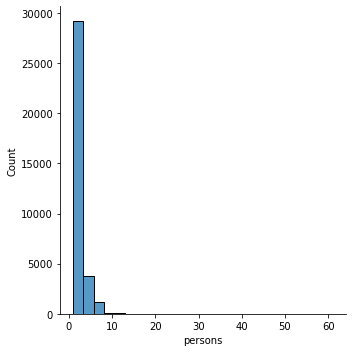

In [17]:
# check for extreme values
sns.displot(df_car['persons'], bins=25)

In [18]:
# Check observation with more than 10 people involved in an accident
df_car[df_car['persons'] > 10 ]

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range,speed_range,drug_alcohol_use,weekday_no
120,120,Alabama,"March 2, 2020",Monday,TALLADEGA,7:10,7,2,21,1,State Highway,Rural,41,Female,Valid,2010.0,Hyundai,Sonata,55,Yes,Rain,Yes,Stimulant,AMPHETAMINE,No,0.000,White,Adult,31 - 59 mph,drugs,1.0
257,257,Alabama,"May 16, 2020",Saturday,BALDWIN,17:55,17,3,13,1,County Road,Rural,62,Male,Not licensed,2000.0,Chevrolet,Silverado,55,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.246,White,Older Adult,31 - 59 mph,alcohol,6.0
654,654,Alabama,"September 6, 2020",Sunday,BALDWIN,16:9,16,4,13,1,State Highway,Urban,43,Male,Valid,2013.0,Chevrolet,Camaro,45,No,Clear,No,No drug,Reported as Unknown if Tested for Drugs,Unknown,0.000,White,Adult,31 - 59 mph,none,7.0
1333,1333,Arizona,"August 22, 2020",Saturday,PIMA,20:28,20,5,11,1,State Highway,Urban,41,Male,Valid,2004.0,Chevrolet,Trailblazer,35,Yes,Clear,No,No drug,Test Not Given,No,0.000,Not a Fatality (not Applicable),Adult,31 - 59 mph,none,6.0
1609,1609,Arizona,"December 1, 2020",Tuesday,MOHAVE,18:30,18,2,11,1,U.S. Highway,Rural,36,Male,Suspended,2013.0,Toyota,Camry,45,No,Clear,Yes,Opioid,FENTANYL,No,0.000,White,Young adult,31 - 59 mph,drugs,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31653,31653,Texas,"December 16, 2020",Wednesday,MARTIN,21:2,21,5,12,1,Interstate,Rural,37,Male,Valid,2012.0,Kenworth,T8 Series,75,Yes,Clear,No,No drug,Reported as Unknown if Tested for Drugs,No,0.000,White,Young adult,60mph and above,none,3.0
31848,31848,Utah,"February 25, 2020",Tuesday,SALT LAKE,6:15,6,2,12,1,Local Street,Urban,28,Male,Suspended,2010.0,Chevrolet,Malibu,30,No,Clear,Yes,Cannabis,Tetrahydrocannabinols (THC),No,0.000,Not a Fatality (not Applicable),Young adult,31 - 59 mph,drugs,2.0
33076,33076,Washington,"June 7, 2020",Sunday,DOUGLAS,13:5,13,3,14,2,U.S. Highway,Rural,30,Male,Not licensed,2001.0,Chevrolet,Astro Van,60,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.000,Other Race,Young adult,60mph and above,none,7.0
34238,34238,Wyoming,"January 20, 2020",Monday,ALBANY,10:19,10,4,11,1,U.S. Highway,Urban,33,Male,Valid,2002.0,Ford,Explorer,65,No,Clear,No,No drug,Test Not Given,No,0.000,Not a Fatality (not Applicable),Young adult,60mph and above,none,1.0


In [19]:
# There are 74 records that have more than 10 people, I will remove them from the data
df_car = df_car[df_car['persons'] < 10 ]

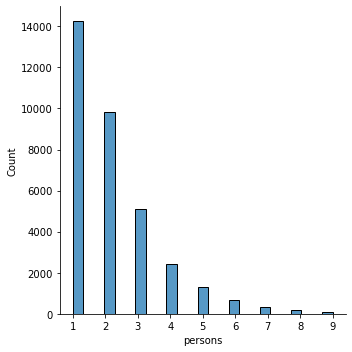

In [20]:
# check for extreme values
sns.displot(df_car['persons'], bins=25)

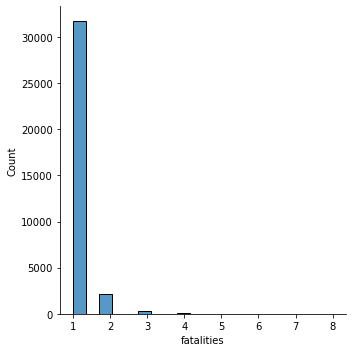

In [21]:
# check for extreme values
sns.displot(df_car['fatalities'], bins=20)

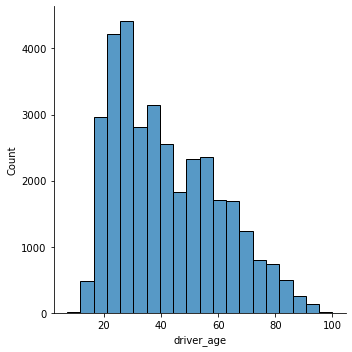

In [22]:
# check for extreme values
sns.displot(df_car['driver_age'], bins=20)

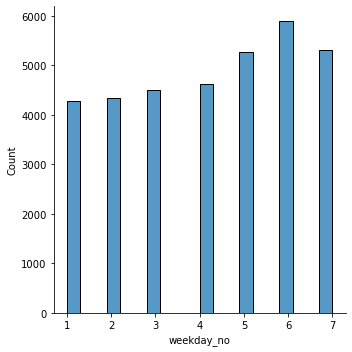

In [23]:
# check for extreme values
sns.displot(df_car['weekday_no'], bins=20)

In [24]:
# Create a subset of numeric data

sub = df_car[['total_vehicles', 'persons', 'fatalities', 'driver_age', 'car_year', 'speed_limit', 'alcohol_level (%)', 'weekday_no']]

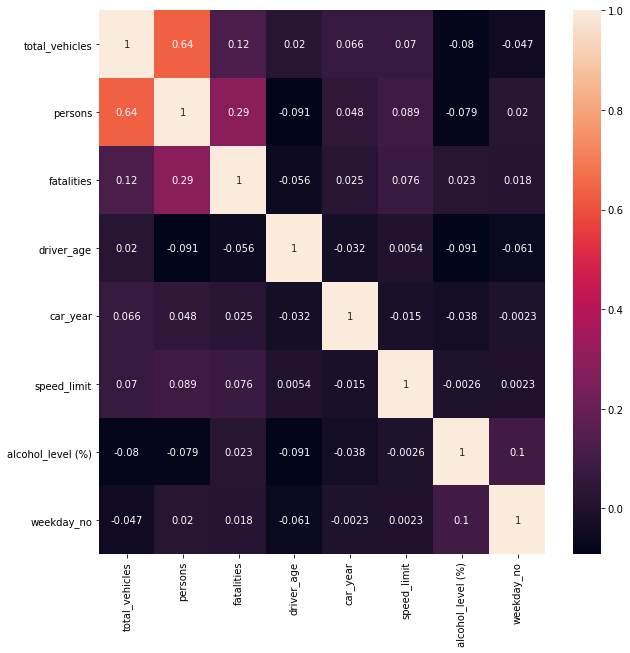

In [25]:
# I want to check the correlation coefficients again. 
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

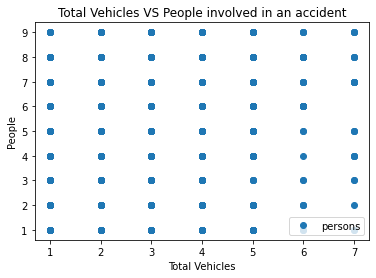

In [26]:
# Create a scatterplot using the higest r --> total_vehicles and persons
df_car.plot(x = 'total_vehicles', y='persons',style='o')
plt.title('Total Vehicles VS People involved in an accident')  
plt.xlabel('Total Vehicles')  
plt.ylabel('People')  
plt.show()

### I don't like this at all, I will keep looking for more combinations

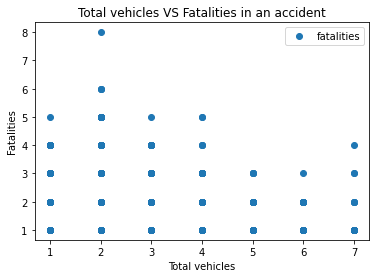

In [27]:
# Create a scatterplot
df_car.plot(x = 'total_vehicles', y='fatalities',style='o')
plt.title('Total vehicles VS Fatalities in an accident')  
plt.xlabel('Total vehicles')  
plt.ylabel('Fatalities')  
plt.show()

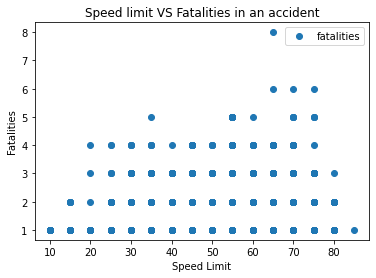

In [28]:
# Create a scatterplot
df_car.plot(x = 'speed_limit', y='fatalities',style='o')
plt.title('Speed limit VS Fatalities in an accident')  
plt.xlabel('Speed Limit')  
plt.ylabel('Fatalities')  
plt.show()

## 4. Hypothesis

### I will use the combination of the 2 variables that give me the highest correlation coefficient:

### " The more vehicles involved in any accident, the more people that are involved in it. "

## 5. Reshape the variables into NumPy arrays

In [29]:
X = df_car['total_vehicles'].values.reshape(-1,1)
y = df_car['persons'].values.reshape(-1,1)

In [30]:
X

array([[1],
       [4],
       [2],
       ...,
       [3],
       [2],
       [1]])

In [31]:
y

array([[4],
       [6],
       [2],
       ...,
       [9],
       [3],
       [2]])

## 6. Split the data into a training set and a test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Run a linear regression on the data 
### 7.1 Fit the model you created to the training set. 

In [33]:
# Create a regression object.
regression = LinearRegression()

In [34]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

### 7.2 Then, create a prediction for y on the test set

In [35]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

## 8. Create a plot that shows the regression line on the test set.

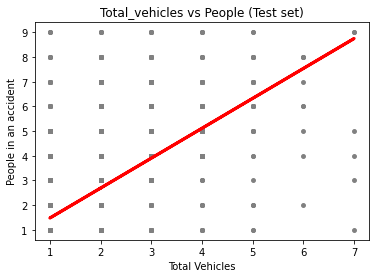

In [36]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total_vehicles vs People (Test set)')
plot_test.xlabel('Total Vehicles')
plot_test.ylabel('People in an accident')
plot_test.show()

## 9. Interpretation of how well the line appears to fit the data.

### Since we are using discrete data, it is a little difficult to see the behavior.

## 10. Check the model performance statistics (MSE and R2)

In [37]:
# Create objects of the model's summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [38]:
# Print model's summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.21127897]]
Mean squared error:  1.2397598240826697
R2 score:  0.40229992370399636


## 11. Compare the predicted y values with the actual y values in a dataframe

In [39]:
y_predicted

array([[2.69084701],
       [2.69084701],
       [1.47956803],
       ...,
       [2.69084701],
       [1.47956803],
       [2.69084701]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,2.690847
1,2,2.690847
2,2,1.479568
3,1,1.479568
4,1,1.479568
5,2,2.690847
6,1,1.479568
7,3,2.690847
8,1,1.479568
9,3,1.479568


In [41]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.21127897]]
Mean squared error:  1.1782844666445753
R2 score:  0.4076032156757897


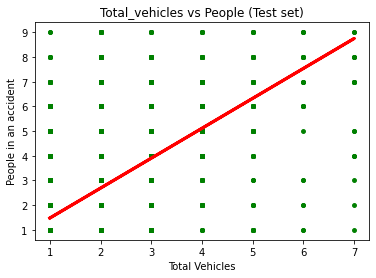

In [44]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total_vehicles vs People (Test set)')
plot_test.xlabel('Total Vehicles')
plot_test.ylabel('People in an accident')
plot_test.show()

### Actual values: slope = 1.21 MSE = 1.2398  r^2 = 0.4023  --> r = .634
### Test value:       slope = 1.21 MSE = 1.1783  r^2 = 0.4076  --> r = .637

### The slope is the same for both sets, and the Mean Standard Error is close! Coefficient of determination is low for both but fairly close. And the Correlation coefficient is at 63% for both. 

### So eventhough we have a weak predictive model (using these 2 variables) the model seems to work fine!

In [45]:
# Export cleaned data
df_car.to_csv(os.path.join(path, '2 Data','Prepared data', 'accidents_clean3.csv'))

### The END! 